In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [3]:
%matplotlib inline

In [4]:
sns.set_style("whitegrid", {'axes.grid': False})
sns.set(palette="muted", color_codes=True, font_scale=2)

In [5]:
# Import CSV Tables
df_comments = pd.read_csv('spiegel_comments_sentiment.csv',index_col=0) # import CSV Auswertung Threads
df_article_spiegel = pd.read_csv('df_gesamt.csv', index_col=0) # Import CSV Auswertung Artikel-Spiegel
df_article_bild = pd.read_csv('df_gesamt_bild.csv', index_col=0) # Import CSV Auswertung Artikel-Bild

# RESET Index
df_comments.set_index('Id',inplace = True)
df_article_spiegel.set_index('Id',inplace = True)
df_article_bild.set_index('Id',inplace=True)

# Join Tables
df_spiegel = df_article_spiegel.join(df_comments).dropna()

# Convertings
to_drop_spiegel = df_spiegel[(df_spiegel['lesbarkeit']<0) | (df_spiegel['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_spiegel.drop(to_drop_spiegel.index, inplace = True)

df_bild = df_article_bild.dropna()
to_drop_bild = df_bild[(df_bild['lesbarkeit']<0) | (df_bild['lesbarkeit']>100)] # drop rows Lesbarkeit kleiner 0 oder größer 100
df_bild.drop(to_drop_bild.index, inplace = True)




In [6]:
describe_spiegel = df_spiegel.describe()
describe_spiegel[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,625.0,625.000000,625.000000,625.000000,625.000000,625.000000
mean,1.0,50.216160,0.057845,0.084441,145.793600,620.521600
std,0.0,8.185391,0.107542,0.058467,150.558364,302.175037
min,1.0,12.200000,-0.370000,0.000000,10.000000,57.000000
25%,1.0,45.690000,-0.011765,0.042424,46.000000,381.000000
50%,1.0,50.300000,0.063953,0.080000,95.000000,578.000000
75%,1.0,55.780000,0.122500,0.120690,188.000000,825.000000
max,1.0,73.580000,0.385417,0.500000,1251.000000,1819.000000


In [7]:
describe_bild = df_bild.describe()
describe_bild[['articles_counts','lesbarkeit','polarity','subjectivity','thread_counts','word_counts']]

,articles_counts,lesbarkeit,polarity,subjectivity,thread_counts,word_counts
count,98.0,98.000000,98.000000,98.000000,98.0,98.000000
mean,1.0,43.896531,0.036057,0.123487,0.0,307.826531
std,0.0,14.278916,0.259439,0.168485,0.0,225.784179
min,1.0,5.300000,-1.000000,0.000000,0.0,26.000000
25%,1.0,35.382500,-0.090265,0.003125,0.0,120.500000
50%,1.0,44.170000,0.048237,0.072556,0.0,281.500000
75%,1.0,53.387500,0.171275,0.166667,0.0,442.000000
max,1.0,72.530000,1.000000,1.000000,0.0,1037.000000


#### Anzahl Artikel nach Jahren

In [8]:
df_counts = df_spiegel[['articles_counts','word_counts','thread_counts',
                        'year','month']].dropna().groupby(['month','year']).sum()
#df_counts.reset_index(inplace=True)
#ax = sns.lineplot(x='month', y='word_counts', data=df_counts)
#df_counts.plot.line(x='month',y='word_counts')

#fig = plt.figure(figsize=(15, 8))
#ax = fig.add_subplot(111)
#sns.distplot(df_counts.query('year == "2019"')['word_counts'], hist=True)

### Verteilungskurven

#### Kommentare & Anzahl Artikel

In [9]:
df_spiegel.articles_counts.sum()

625

Text(0.5, 0, 'Anzahl Artikel')

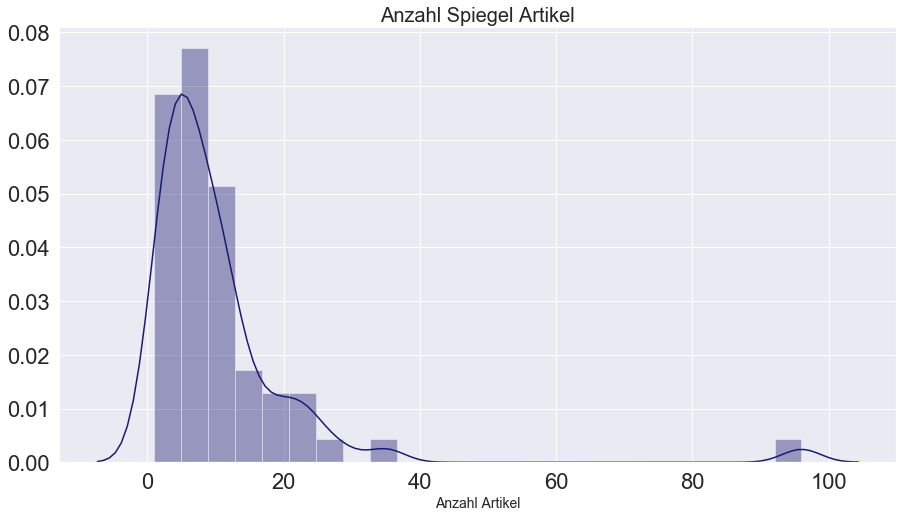

In [10]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_counts.articles_counts, norm_hist=True,color='midnightblue')
axes.set_title('Anzahl Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Artikel', size=14)

Text(0.5, 0, 'Anzahl Wörter')

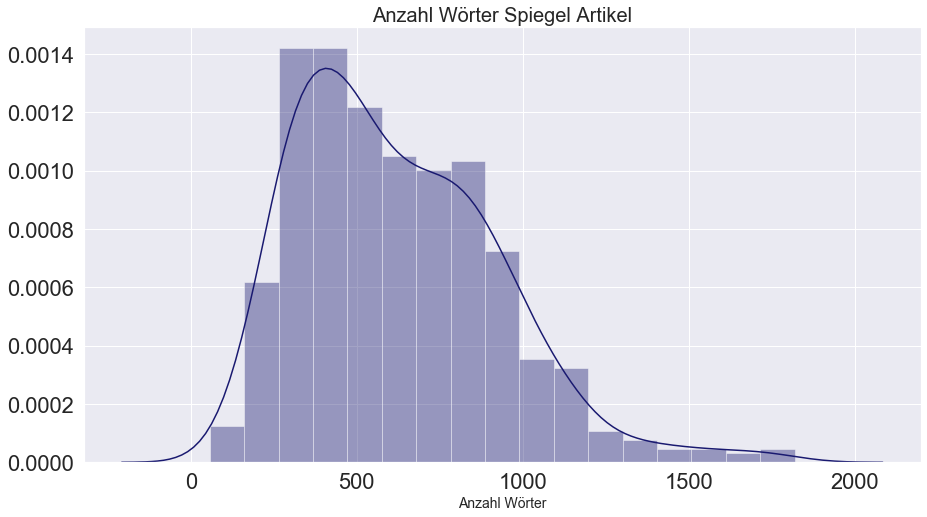

In [11]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.word_counts, norm_hist=True, color='midnightblue')
axes.set_title('Anzahl Wörter Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Wörter', size=14)

Text(0.5, 0, 'Anzahl Kommentare')

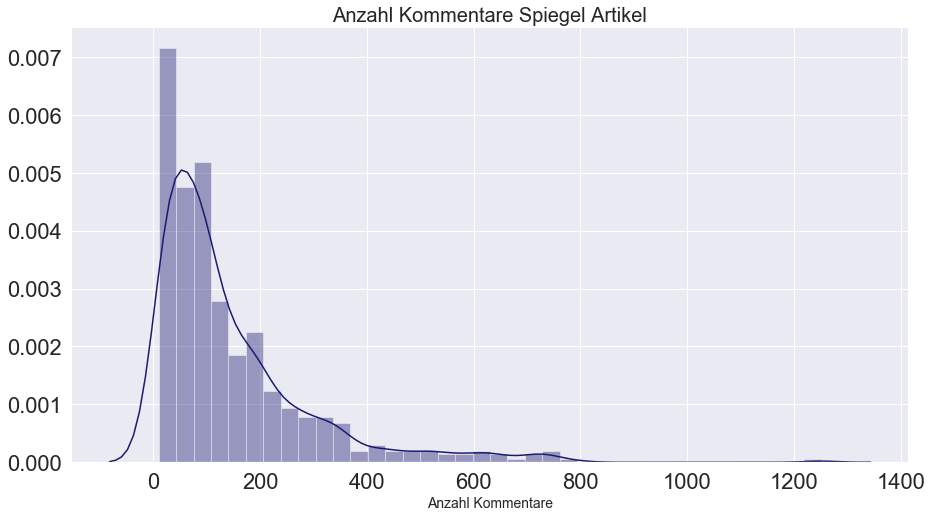

In [12]:
fig = plt.figure(figsize=(15,8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.thread_counts, norm_hist=True, color='midnightblue')
axes.set_title('Anzahl Kommentare Spiegel Artikel', size=20)
axes.set_xlabel('Anzahl Kommentare', size=14)

In [13]:
# Entwicklung Anzahl Artikel pro Jahr und Monat

Text(0.5, 1.0, 'Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019')

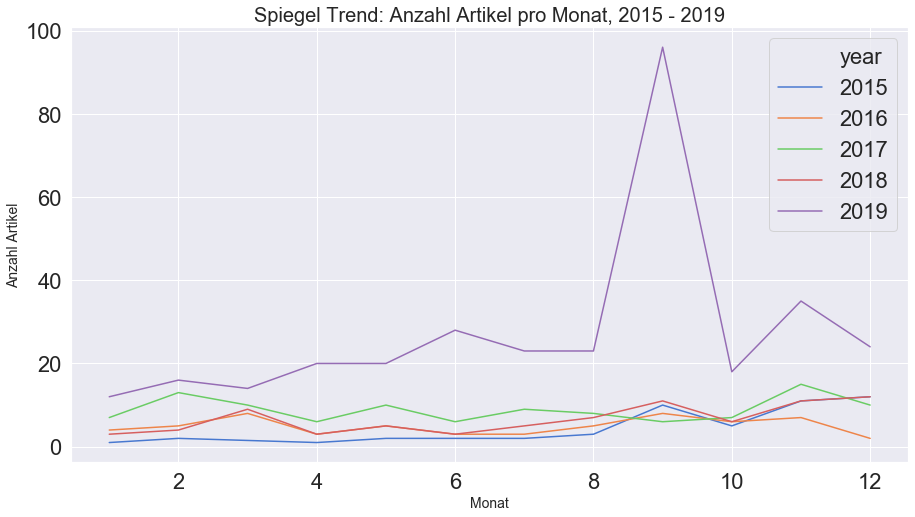

In [14]:
art_monatl = df_spiegel[["year","month","day","articles_counts"]]
g = art_monatl.groupby(['year','month'])['articles_counts'].sum()

g = pd.DataFrame(g)
g.reset_index(inplace=True)

fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',5)
sns.lineplot(x='month', y='articles_counts', hue='year', palette=color, data=g)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Artikel', size=14)
axes.set_title('Spiegel Trend: Anzahl Artikel pro Monat, 2015 - 2019', size=20)

 Spiegel Verteilung Lesbarkeit (alle Jahre)

Text(0.5, 1.0, 'Verteilung Lesbarkeitsindex Spiegel Artikel')

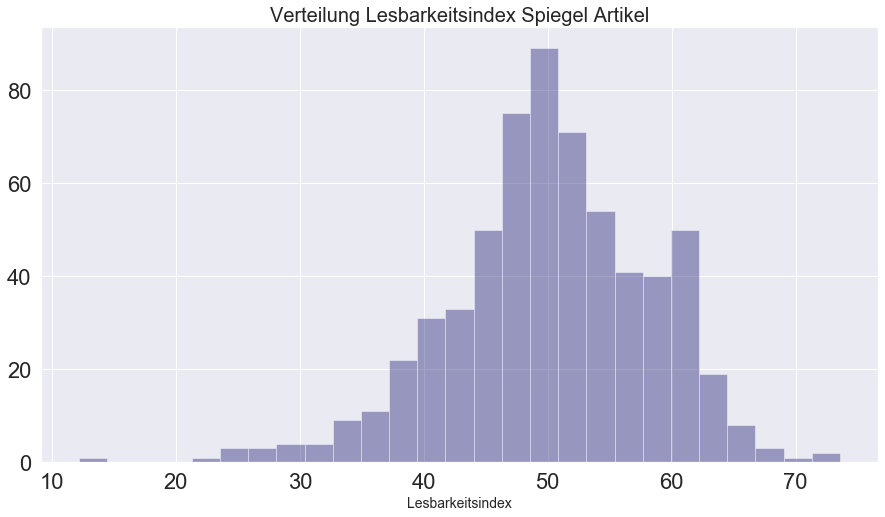

In [15]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.lesbarkeit.dropna(),color= 'midnightblue',kde=False)
axes.set_xlabel('Lesbarkeitsindex', size=14)
axes.set_title('Verteilung Lesbarkeitsindex Spiegel Artikel', size=20)

Sentimentsanalyse Spiegel (hier wäre es toll, wenn die Grafiken nebeneinander platziert werden könnten!)

Text(0.5, 1.0, 'Verteilung Polarity Spiegel Artikel')

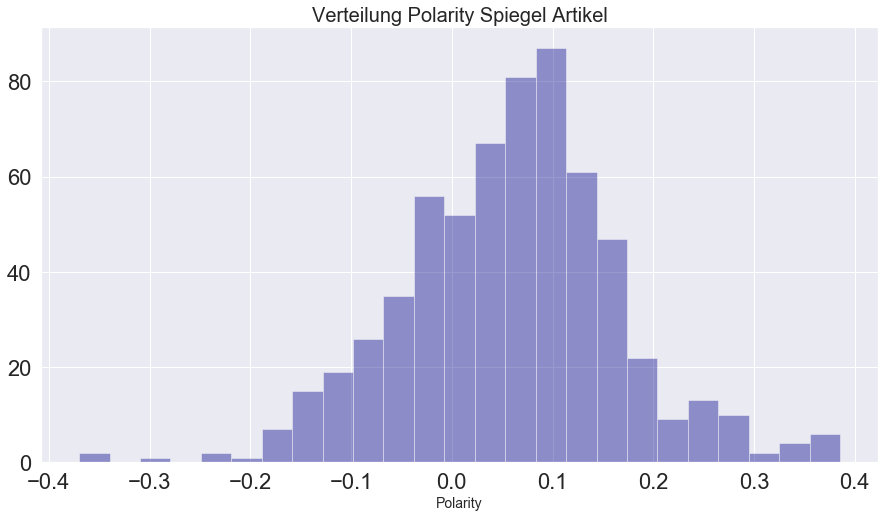

In [16]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.polarity.dropna(),color= 'darkblue',kde=False)
axes.set_xlabel('Polarity', size=14)
axes.set_title('Verteilung Polarity Spiegel Artikel', size=20)

Text(0.5, 1.0, 'Verteilung Subjectivity Spiegel Artikel')

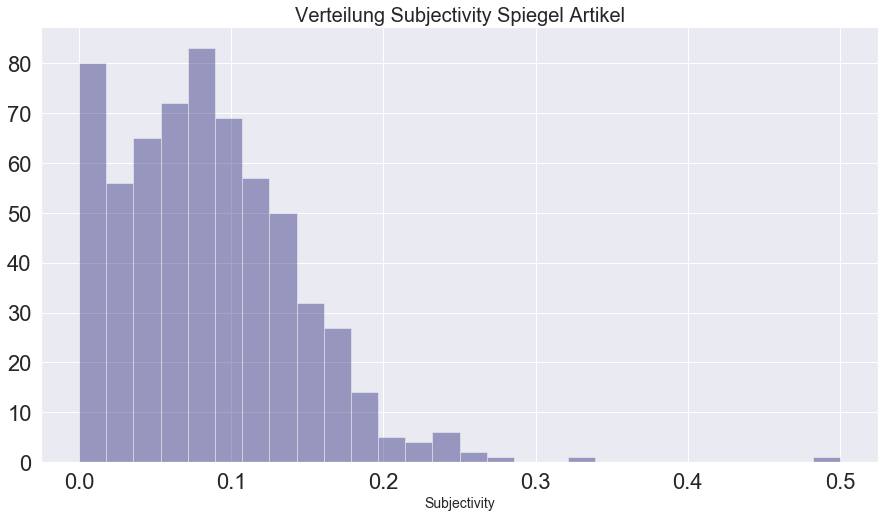

In [17]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegel.subjectivity.dropna(),color= 'midnightblue',kde=False)
axes.set_xlabel('Subjectivity', size=14)
axes.set_title('Verteilung Subjectivity Spiegel Artikel', size=20)

(array([0.02040816, 0.12244898, 0.24489796, 0.2755102 , 0.2244898 ,
        0.1122449 ]),
 array([ 5.3  , 16.505, 27.71 , 38.915, 50.12 , 61.325, 72.53 ]),
 <a list of 6 Patch objects>)

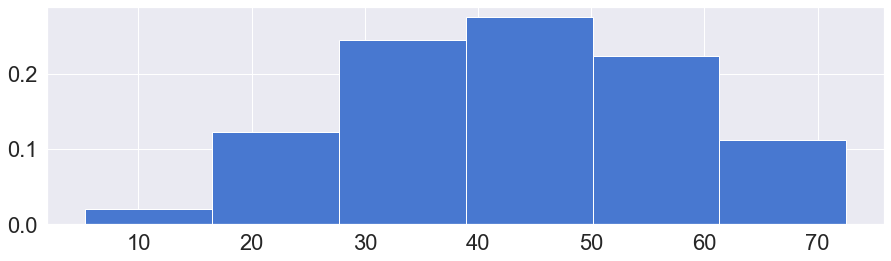

In [18]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(111)
ax.hist(df_bild.lesbarkeit.dropna(), bins=6,
        weights=np.zeros_like(df_bild.lesbarkeit.dropna().values) + 1. / (df_bild.lesbarkeit.dropna().values).size)

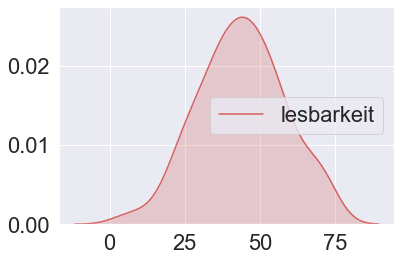

In [19]:
ax = sns.kdeplot(df_bild.lesbarkeit.dropna(), shade=True, color="r")

In [20]:
# Anzahl Artikel 
grouped = df_bild.groupby('year').agg({'word_counts':[sum,min,max, np.mean, np.median]})
grouped.columns = ['_'.join(x) for x in grouped.columns]
grouped

,word_counts_sum,word_counts_min,word_counts_max,word_counts_mean,word_counts_median
year,,,,,
2019,30167,26,1037,307.826531,281.5


In [21]:
df_bild.groupby('month').word_counts.describe().unstack(1)

       month
count  1           2.000000
       2           4.000000
       3           5.000000
       4           2.000000
       5           2.000000
       6           5.000000
       8           2.000000
       9           2.000000
       10          2.000000
       11         43.000000
       12         29.000000
mean   1         212.000000
       2         295.000000
       3         338.600000
       4         188.000000
       5         112.000000
       6         187.400000
       8         236.500000
       9         279.500000
       10        291.000000
       11        337.255814
       12        317.827586
std    1         158.391919
       2         242.459619
       3         324.442291
       4         195.161472
       5          49.497475
       6         126.044833
       8         167.584307
       9         207.182287
                   ...     
50%    4         188.000000
       5         112.000000
       6         157.000000
       8         236.500000
       

Text(0.5, 1.0, 'Verteilung Anzahl Wörter Bild Artikel')

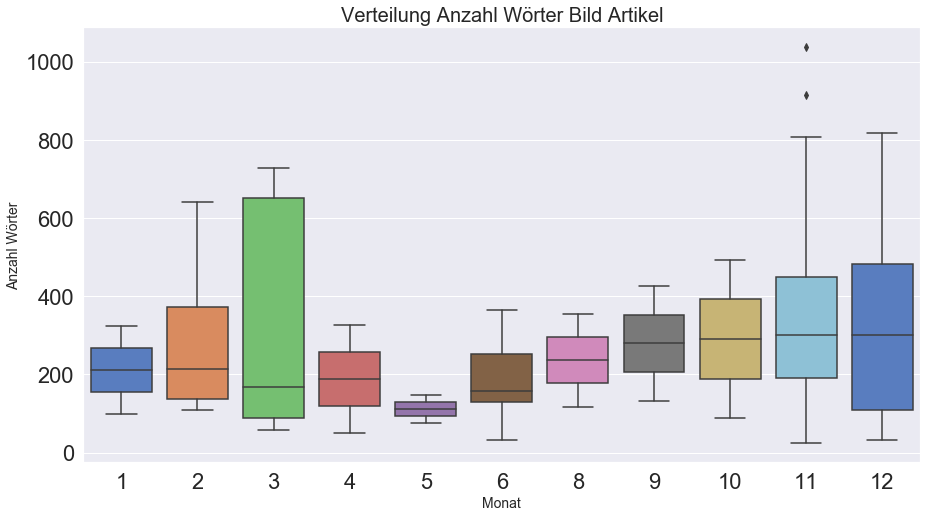

In [22]:
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
color = sns.color_palette('muted',11)
sns.boxplot(x="month", y="word_counts", data=df_bild,palette=color)
axes.set_xlabel('Monat', size=14)
axes.set_ylabel('Anzahl Wörter', size=14)
axes.set_title('Verteilung Anzahl Wörter Bild Artikel', size=20)

In [23]:
#plt.rcParams['axes.formatter.useoffset'] = False 

Text(0.5, 1, 'Relation zwischen Anzahl Wörter und Anzahl Kommentare Spiegel Artikel')

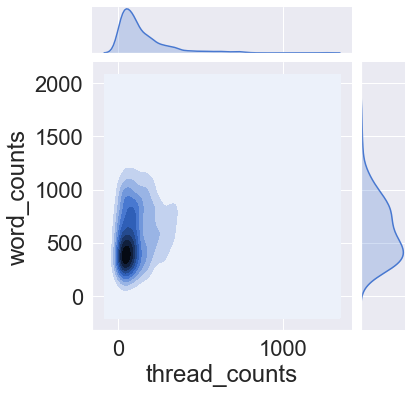

In [24]:
# joint-plot Anzahl Kommentare und Anzahl Wörter in Artikel
sns.jointplot(x='thread_counts', y='word_counts', data=df_spiegel, kind='kde')
axes.set_xlabel('Anzahl Kommentare', size=14)
axes.set_ylabel('Anzahl Wörter', size=14)
axes.set_title('Relation zwischen Anzahl Wörter und Anzahl Kommentare Spiegel Artikel', size=20)

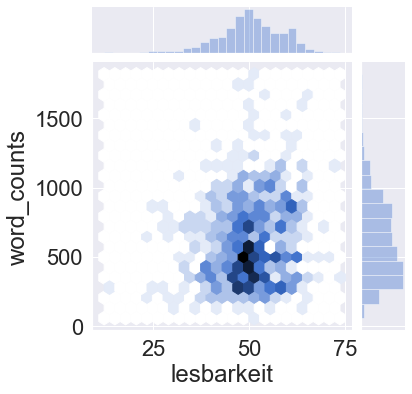

In [25]:
# joint-plot Lesbarkeit und Anzahl Wörter in Artikel
sns.jointplot(x='lesbarkeit', y='word_counts', data=df_spiegel, kind='hex')

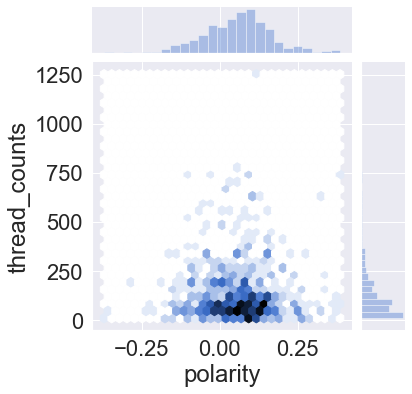

In [26]:
# joint-plot Anzahl Polarity und Anzahl Kommentare in Artikel
sns.jointplot(x='polarity', y='thread_counts', data=df_spiegel, kind='hex')

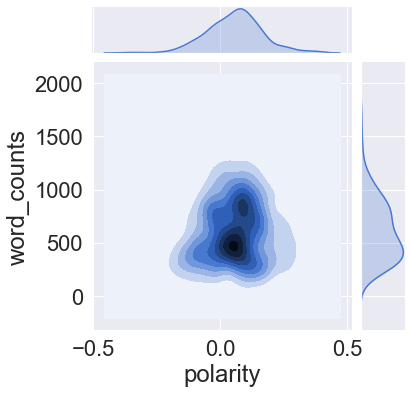

In [27]:
# joint-plot Anzahl Polarity und Anzahl Wörter in Artikel
sns.jointplot(x='polarity', y='word_counts', data=df_spiegel, kind='kde')

### SpiegelBild

Spiegel und Bild Arikel zusammengefasst und aggregiert auf den Zeitraum 11.11 bis 19.12.2019

In [28]:
# zum Vergleich Spiegel und BILD
df_spiegel11_12 = df_spiegel.query('year==2019')\
.query('(month == 11 and day >= 12) or (month==12 and day <=19)') # Einschränkung auf den Zeitraum 11.11 bis 19.12.2019

df_bild11_12 = df_bild.query('month >=11')

In [29]:
tmp_df_spiegel = pd.DataFrame({'word_counts': df_spiegel11_12.word_counts.copy(),
                              'lesbarkeit': df_spiegel11_12.lesbarkeit.copy(),
                             'polarity': df_spiegel11_12.polarity.copy(),
                             'subjectivity': df_spiegel11_12.subjectivity.copy()})
tmp_df_spiegel['Quelle'] ='Spiegel'
tmp_df_bild = pd.DataFrame({'word_counts': df_bild11_12.word_counts.copy(),
                           'lesbarkeit':df_bild11_12.lesbarkeit.copy(),
                           'polarity': df_bild11_12.polarity.copy(),
                           'subjectivity': df_bild11_12.subjectivity.copy()})
tmp_df_bild['Quelle'] ='Bild'
df_spiegelbild = pd.concat([tmp_df_spiegel, tmp_df_bild])

Tabelle Vergleich Spiegel und Bild

In [30]:
df_spiegelbild.groupby('Quelle').describe().round(3)

word_counts                                                        \
              count     mean      std   min     25%    50%    75%     max   
Quelle                                                                      
Bild           72.0  329.431  231.871  26.0  140.25  301.5  469.0  1037.0   
Spiegel        53.0  599.208  293.330  57.0  378.00  509.0  815.0  1342.0   

        lesbarkeit          ... polarity       subjectivity                \
             count    mean  ...      75%   max        count   mean    std   
Quelle                      ...                                             
Bild          72.0  45.510  ...    0.172  1.00         72.0  0.118  0.178   
Spiegel       53.0  49.853  ...    0.103  0.26         53.0  0.082  0.064   

                                          
         min    25%    50%    75%    max  
Quelle                                    
Bild     0.0  0.014  0.059  0.125  1.000  
Spiegel  0.0  0.040  0.079  0.111  0.333  

[2 rows x 32 columns]

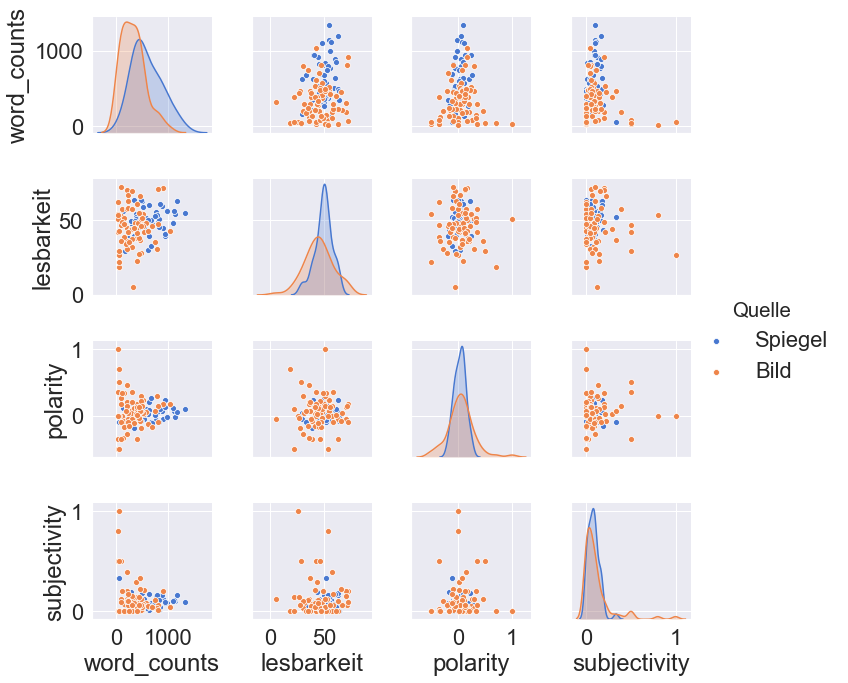

In [31]:
sns.pairplot(df_spiegelbild, hue='Quelle', palette='muted')


Violine Plots

In [42]:
df_spiegelbild = pd.DataFrame(df_spiegelbild)
df_spiegelbild.reset_index(inplace=True)

In [43]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x="all", y="subjectivity", hue="Quelle", data=df_spiegelbild, 
               ax=axes[0], split=True).set_title('Verteilung Subjektivität')
sns.violinplot(x="all", y="Polarity", hue="Quelle", data=df_spiegelbild, ax=axes[1], split=True)

ValueError: Could not interpret input 'all'

In [0]:
sns.set(rc={'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 2)
sns.violinplot(x="all", y="lesbarkeit", hue="Quelle", data=df_spiegelbild, 
               ax=axes[0], split=True).set_title('Verteilung Lesbarkeit')
sns.violinplot(x="all", y="word_counts", hue="Quelle", 
               data=df_spiegelbild, ax=axes[1], split=True).set_title('Verteilung Anzahl Wörter in Artikel')

In [0]:
#verlgeichen mit Lesbarkeit
fig = plt.figure(figsize=(15, 8))
axes = fig.add_subplot(111)
sns.distplot(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'], hist=True)
sns.distplot(df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'], hist=True)
axes.set_xlabel('Lesbarkeitdindex', size=14)
axes.set_title('Vergleich Lesbarkeitsindex zwischen Bild und Spiegel', size=20)
#plt.legend(df_spiegelbild['Quelle']) ## ??????

### Statistik Tests

In [0]:
help(stats.mannwhitneyu)

In [0]:
import scipy.stats as stats

stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                   df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')['lesbarkeit'].values,
                df_spiegelbild.query('Quelle == "Bild"')['lesbarkeit'].values)

In [0]:
col_names = list(df_spiegelbild.columns)[:-2]

liste_ttest = []
liste_mann = []
for x in col_names:
    liste_ttest.append(stats.ttest_ind(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                    df_spiegelbild.query('Quelle == "Bild"')[x].values))
    
    liste_mann.append(stats.mannwhitneyu(df_spiegelbild.query('Quelle == "Spiegel"')[x].values,
                   df_spiegelbild.query('Quelle == "Bild"')[x].values))

    

In [0]:
df_stat_test = pd.DataFrame({'var_name':col_names,
                            'ttest_statistik':np.array(liste_ttest)[:,0],
                            'ttest_pvalue':np.array(liste_ttest)[:,1],
                            'mann_statistik':np.array(liste_mann)[:,0],
                            'mann_pvalue':np.array(liste_mann)[:,1]})

In [0]:
df_stat_test.set_index(['var_name']).round(3)